<a href="https://colab.research.google.com/github/YoooonaLee/machine_learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

캐글 다이아몬드 가격 예측 dataset 활용



>A data frame with 53940 rows and 10 variables:

* price: price in US dollars (\$326--\$18,823) ⭐타겟⭐


* carat: weight of the diamond (0.2--5.01)

* cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color: diamond colour, from J (worst) to D (best)

* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x:length in mm (0--10.74)

* y: width in mm (0--58.9)

* z: depth in mm (0--31.8)

* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table: width of top of diamond relative to widest point (43--95)




In [16]:
from google.colab import drive
import pandas as pd
from IPython.display import display

# Google Drive 마운트
drive.mount('/content/drive')

# CSV 파일 경로 설정
file_path = '/content/drive/My Drive/전공/기계학습/data/diamonds.csv'

# CSV 파일을 DataFrame으로 불러오기
diamonds = pd.read_csv(file_path)

# 'Unnamed: 0' 열 제거
diamonds.drop(columns=['Unnamed: 0'], inplace=True)

# 결과 확인
diamonds


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
diamonds.isnull().sum() #

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [18]:
from sklearn.preprocessing import StandardScaler
# 평균을 0, 표준편차를 1로 조정

# 범주형 열을 제외한 수치형 데이터 선택
numeric_features = diamonds.drop(columns=['cut', 'color', 'clarity'])

# StandardScaler 적용
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)#범줒형아닌것들만 우선 스케일링

# 스케일링된 데이터를 DataFrame으로 변환하고 기존 범주형 데이터와 결합
numeric_features_scaled_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)
diamonds = pd.concat([numeric_features_scaled_df, diamonds[['cut', 'color', 'clarity']]], axis=1)

# 결과 확인
diamonds

,carat,depth,table,price,x,y,z,cut,color,clarity
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129,Ideal,E,SI2
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175,Premium,E,SI1
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175,Good,E,VS1
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720,Premium,I,VS2
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674,Good,J,SI2
...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,0.016798,0.022304,-0.054888,Ideal,D,SI1
53936,-0.164427,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988,Good,D,SI1
53937,-0.206621,0.733344,1.137995,-0.294731,-0.063434,-0.047741,0.030135,Very Good,D,SI1
53938,0.130927,-0.523105,0.242928,-0.294731,0.373383,0.337506,0.285204,Premium,H,SI2


###범주형 데이터 순서형 인코딩

cut_order = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

color_order = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

clarity_order = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

In [19]:
# 각 열의 고유 값 확인
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


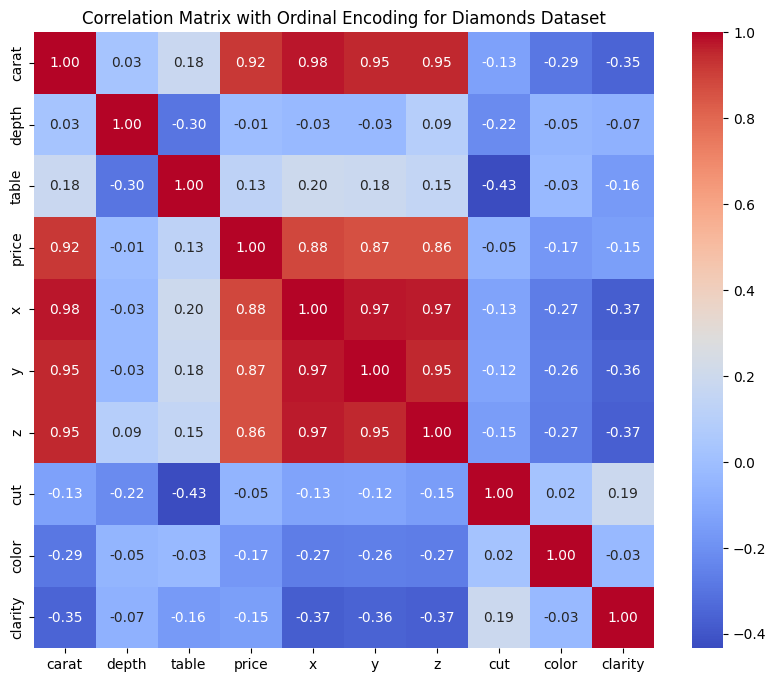

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 매핑 사전 정의
cut_order = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_order = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_order = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
# 숫자 높은게 퀄리티 좋은것⭐


# 매핑 적용
diamonds['cut'] = diamonds['cut'].map(cut_order)
diamonds['color'] = diamonds['color'].map(color_order)
diamonds['clarity'] = diamonds['clarity'].map(clarity_order)



# 상관계수 행렬 계산 및 시각화
correlation_matrix = diamonds.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Ordinal Encoding for Diamonds Dataset")
plt.show()


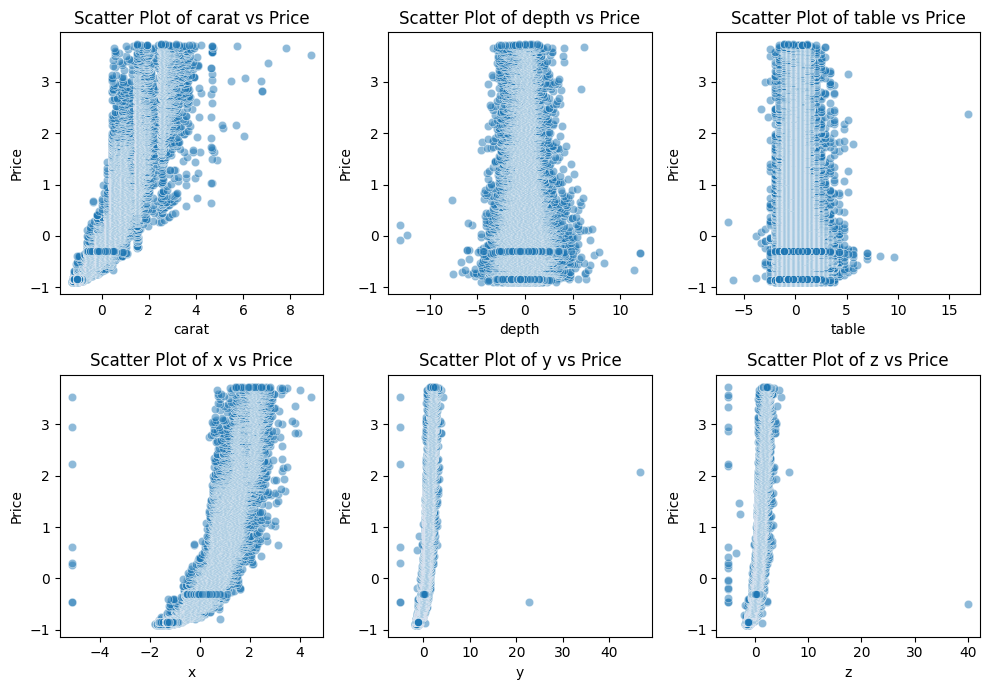

In [39]:
# 연속형 변수만 선택
continuous_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# 연속형 변수와 price 간의 산점도 그리기
plt.figure(figsize=(10, 7))

for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1)  # 2행 3열 서브플롯으로 배치
    sns.scatterplot(data=diamonds, x=feature, y='price', alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

# TEST DATA 결정계수

#####$R^2 (결정계수)$



$$
R^2 =R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
= 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$



$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$
=>예측값과 실제값 차이의 제곱합

$
\text{TSS} = \sum_{i=1}^{n} (y_i - \bar{y})^2
$
=>실제값과 평균값 차이의 제곱합


값이 1에 가까울수록(클수록) 모델이 데이터를 잘 설명하는 것

In [23]:
from sklearn.model_selection import train_test_split

y = diamonds['price']
X = diamonds.drop(columns=['price'])

# 데이터 분할 (train:test = 7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# 선형 회귀 모델 초기화
linear_model = LinearRegression()

# 모델 학습
linear_model.fit(X_train, y_train)

# 훈련 데이터에 대한 예측
y_train_pred = linear_model.predict(X_train)

# 테스트 데이터에 대한 예측
y_test_pred = linear_model.predict(X_test)

# R^2 값 계산
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# MSE 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# 결과 출력
print(f"Training R² value: {train_r2:.4f}, Training MSE: {train_mse:.2f}")
print(f"Testing R² value: {test_r2:.4f}, Testing MSE: {test_mse:.2f}")

Training R² value: 0.9068, Training MSE: 0.09
Testing R² value: 0.9075, Testing MSE: 0.09


Training R² value: 0.8344, Training MSE: 0.17
Testing R² value: 0.9072, Testing MSE: 0.09


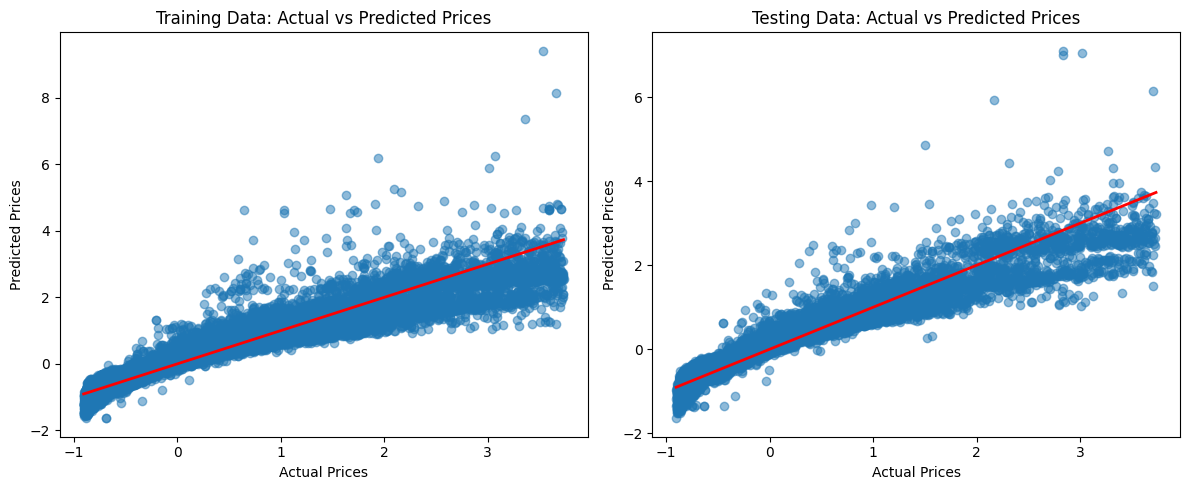

In [41]:
import seaborn as sns

# 결과 출력
print(f"Training R² value: {train_r2:.4f}, Training MSE: {train_mse:.2f}")
print(f"Testing R² value: {test_r2:.4f}, Testing MSE: {test_mse:.2f}")

# 그래프 그리기
plt.figure(figsize=(12, 5))

# 훈련 데이터 산점도
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)  # y=x 선
plt.title('Training Data: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# 테스트 데이터 산점도
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # y=x 선
plt.title('Testing Data: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()


# ⭐ RANSAC 적용 전과 후 비교

 random sample consensus :
 이상치(outlier)가 포함된 데이터에서도 안정적으로 모델을 학습할 수 있도록 설계된 회귀 방법


 데이터의 일부를 무작위로 샘플링하여 모델을 구축한 뒤, 이상치와 적합치(inlier)를 구분

residual_threshold: 적합치랑 이상치를 이값을 기준으로 분류 ///
잔차가 이거보다 클 때만 해당데이터를 이상치로 분류

In [35]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# 평가지표 정의 (R² 스코어와 MSE를 활용)
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# RANSAC의 하이퍼파라미터 범위 정의
param_distributions = {
    'residual_threshold': np.linspace(0.5, 10, 20),  # 0.5에서 10 사이의 값을 랜덤하게 선택
    'max_trials': [50, 100, 150, 200],               # 반복 횟수 선택
    'min_samples': [0.1, 0.2, 0.3, 0.5, 0.7]         # 최소 샘플 비율 (데이터의 10%, 20% 등)
}

# RANSAC 모델 정의
ransac = RANSACRegressor(LinearRegression())

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=ransac,
    param_distributions=param_distributions,
    n_iter=20,                   # 랜덤 탐색 횟수
    scoring=scoring,             # 평가 방식
    refit='R2',                  # R2를 기준으로 최적 모델 선택
    cv=5,                        # 5-Fold 교차 검증
    random_state=42,
    n_jobs=-1                    # 병렬 처리
)

# 모델 학습
random_search.fit(X_train, y_train)

# 최적의 파라미터와 결과 출력
print("Best parameters found:", random_search.best_params_)
print("Best R² score on training set:", random_search.best_score_)

# 테스트 데이터에 대한 성능 확인
best_model = random_search.best_estimator_
y_test_pred_ransac = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred_ransac)
test_mse = mean_squared_error(y_test, y_test_pred_ransac)

print(f"Testing R²: {test_r2:.4f}, Testing MSE: {test_mse:.2f}")



Best parameters found: {'residual_threshold': 2.5, 'min_samples': 0.7, 'max_trials': 50}
Best R² score on training set: 0.9052337728672107
Testing R²: 0.9072, Testing MSE: 0.09


Best threshold: 5.078947368421053
Best RANSAC Training R²: 0.8344, Testing R²: 0.9062
Best RANSAC Training MSE: 0.17, Testing MSE: 0.09


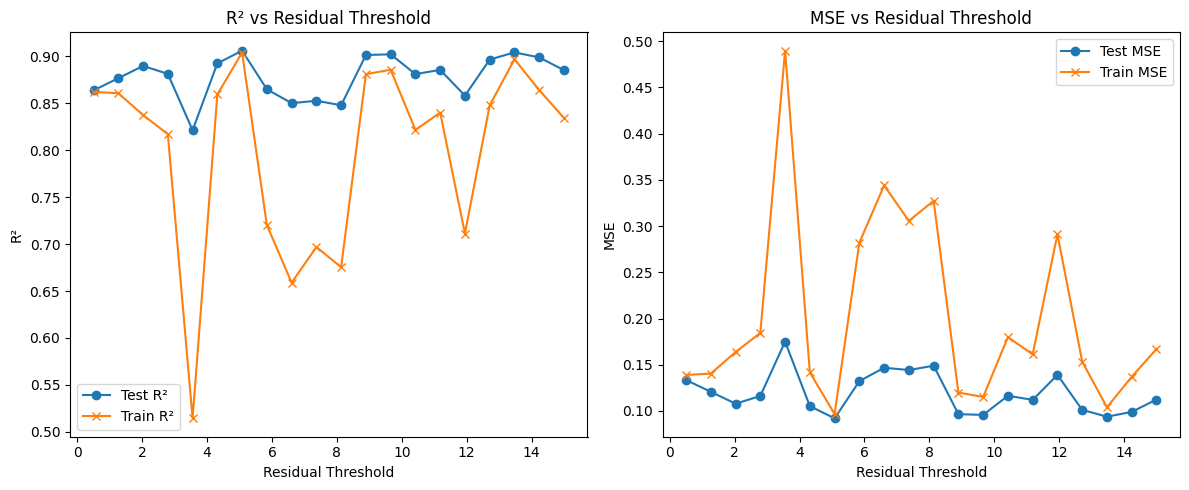

In [34]:
import numpy as np
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 탐색할 residual_threshold 값의 범위 설정
threshold_values = np.linspace(0.5, 15, 20)  # 0.5에서 10까지 20단계로 나누기

# 최적의 threshold 값 찾기 위한 초기값 설정
best_r2 = -np.inf
best_mse = np.inf
best_threshold = None
results = []

# 다양한 threshold 값에 대해 성능 평가
for threshold in threshold_values:
    ransac_model = RANSACRegressor(LinearRegression(), residual_threshold=threshold)
    ransac_model.fit(X_train, y_train)

    # 예측
    y_train_pred_ransac = ransac_model.predict(X_train)
    y_test_pred_ransac = ransac_model.predict(X_test)

    # 성능 평가
    train_mse = mean_squared_error(y_train, y_train_pred_ransac)
    test_mse = mean_squared_error(y_test, y_test_pred_ransac)
    train_r2 = r2_score(y_train, y_train_pred_ransac)
    test_r2 = r2_score(y_test, y_test_pred_ransac)

    # 결과 저장
    results.append((threshold, train_r2, test_r2, train_mse, test_mse))

    # 최적 threshold 갱신
    if test_r2 > best_r2 and test_mse < best_mse:
        best_r2 = test_r2
        best_mse = test_mse
        best_threshold = threshold

# 최적의 threshold 값 출력
print(f"Best threshold: {best_threshold}")
print(f"Best RANSAC Training R²: {train_r2:.4f}, Testing R²: {best_r2:.4f}")
print(f"Best RANSAC Training MSE: {train_mse:.2f}, Testing MSE: {best_mse:.2f}")

# 시각화
thresholds, train_r2s, test_r2s, train_mses, test_mses = zip(*results)

plt.figure(figsize=(12, 5))

# R² 그래프
plt.subplot(1, 2, 1)
plt.plot(thresholds, test_r2s, marker='o', label='Test R²')
plt.plot(thresholds, train_r2s, marker='x', label='Train R²')
plt.xlabel('Residual Threshold')
plt.ylabel('R²')
plt.title('R² vs Residual Threshold')
plt.legend()

# MSE 그래프
plt.subplot(1, 2, 2)
plt.plot(thresholds, test_mses, marker='o', label='Test MSE')
plt.plot(thresholds, train_mses, marker='x', label='Train MSE')
plt.xlabel('Residual Threshold')
plt.ylabel('MSE')
plt.title('MSE vs Residual Threshold')
plt.legend()

plt.tight_layout()
plt.show()


ransac을 적용해도 일반선형회귀보다 낮은 score반환

=> 비교적 이상치가 많지 않은 데이터고,
하나의 피처(carat)에 강한 영향을 받는 데이터이기 때문에 일반적인 선형회귀모델이 더 적합한 모델이었을 수도 있었다고 판단..

#규제 적용해보기


$$
릿지 규제 (L2규제)
\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{m} w_j^2
$$




$$
라쏘 규제 (L1규제)
\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{j=1}^{m} |w_j|
$$

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge #⭐
from sklearn.metrics import r2_score

# Lasso와 Ridge에 사용할 알파, 람다  값 리스트
alpha_values_lasso = [0.01, 0.1, 1] #⭐
lambda_values_ridge = [1, 10, 50, 100] #⭐

# 결과 저장용 변수 초기화
best_r2_test = -float('inf')
best_combination = {}

# 각 Lasso 및 Ridge의 α 값 조합에 대해 모델 학습 및 평가
for alpha_lasso in alpha_values_lasso:
    for lambda_ridge in lambda_values_ridge:
        # Lasso 모델 학습 및 평가
        lasso_model = Lasso(alpha=alpha_lasso) #⭐
        lasso_model.fit(X_train, y_train)
        y_train_pred_lasso = lasso_model.predict(X_train)
        y_test_pred_lasso = lasso_model.predict(X_test)

        train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
        test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

        # Ridge 모델 학습 및 평가
        ridge_model = Ridge(alpha=lambda_ridge) #⭐
        ridge_model.fit(X_train, y_train)
        y_train_pred_ridge = ridge_model.predict(X_train)
        y_test_pred_ridge = ridge_model.predict(X_test)

        train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
        test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

        # 결과 가로로 출력
        print(f"Lasso alpha: {alpha_lasso}, Ridge alpha: {lambda_ridge} => "
              f"Lasso Train R²: {train_r2_lasso:.4f}, Lasso Test R²: {test_r2_lasso:.4f}, "
              f"Ridge Train R²: {train_r2_ridge:.4f}, Ridge Test R²: {test_r2_ridge:.4f}")
        print("-" * 80)

        # 테스트 R²가 최고일 경우 기록
        if test_r2_lasso + test_r2_ridge > best_r2_test:
            best_r2_test = test_r2_lasso + test_r2_ridge
            best_combination = {
                'Lasso alpha': alpha_lasso,
                'Ridge alpha': lambda_ridge,
                'Lasso Test R²': test_r2_lasso,
                'Ridge Test R²': test_r2_ridge
            }

# 최적 조합 출력
print("\nBest combination for highest Test R²:")
print(f"Lasso alpha: {best_combination['Lasso alpha']}, Ridge alpha: {best_combination['Ridge alpha']}")
print(f"Lasso Test R²: {best_combination['Lasso Test R²']:.4f}, Ridge Test R²: {best_combination['Ridge Test R²']:.4f}")


Lasso alpha: 0.01, Ridge alpha: 1 => Lasso Train R²: 0.9037, Lasso Test R²: 0.9040, Ridge Train R²: 0.9068, Ridge Test R²: 0.9075
--------------------------------------------------------------------------------
Lasso alpha: 0.01, Ridge alpha: 10 => Lasso Train R²: 0.9037, Lasso Test R²: 0.9040, Ridge Train R²: 0.9068, Ridge Test R²: 0.9075
--------------------------------------------------------------------------------
Lasso alpha: 0.01, Ridge alpha: 50 => Lasso Train R²: 0.9037, Lasso Test R²: 0.9040, Ridge Train R²: 0.9067, Ridge Test R²: 0.9073
--------------------------------------------------------------------------------
Lasso alpha: 0.01, Ridge alpha: 100 => Lasso Train R²: 0.9037, Lasso Test R²: 0.9040, Ridge Train R²: 0.9065, Ridge Test R²: 0.9071
--------------------------------------------------------------------------------
Lasso alpha: 0.1, Ridge alpha: 1 => Lasso Train R²: 0.8706, Lasso Test R²: 0.8709, Ridge Train R²: 0.9068, Ridge Test R²: 0.9075
-----------------------

#💚💚💚💚💚💚💚💚💚💚💚💚💚💚

#랜덤포레스트로 회귀문제 풀기

여러개의 결정트리를 만들어서, 각 트리의 예측값을 평균내는 방식으로 최종예측을 수행.

여기서 각 트리의 예측은 해당 트리가 학습한 부트스트랩 샘플을 바탕으로(배깅방식)으로 계산된 예측값임.



결정 트리 회귀는 입력 데이터를 특성 값에 따라 순차적으로 분할하고,
**리프 노드(leaf node)**에 도달했을 때 해당 노드에 속한 데이터들의 평균 값을 예측값으로 사용

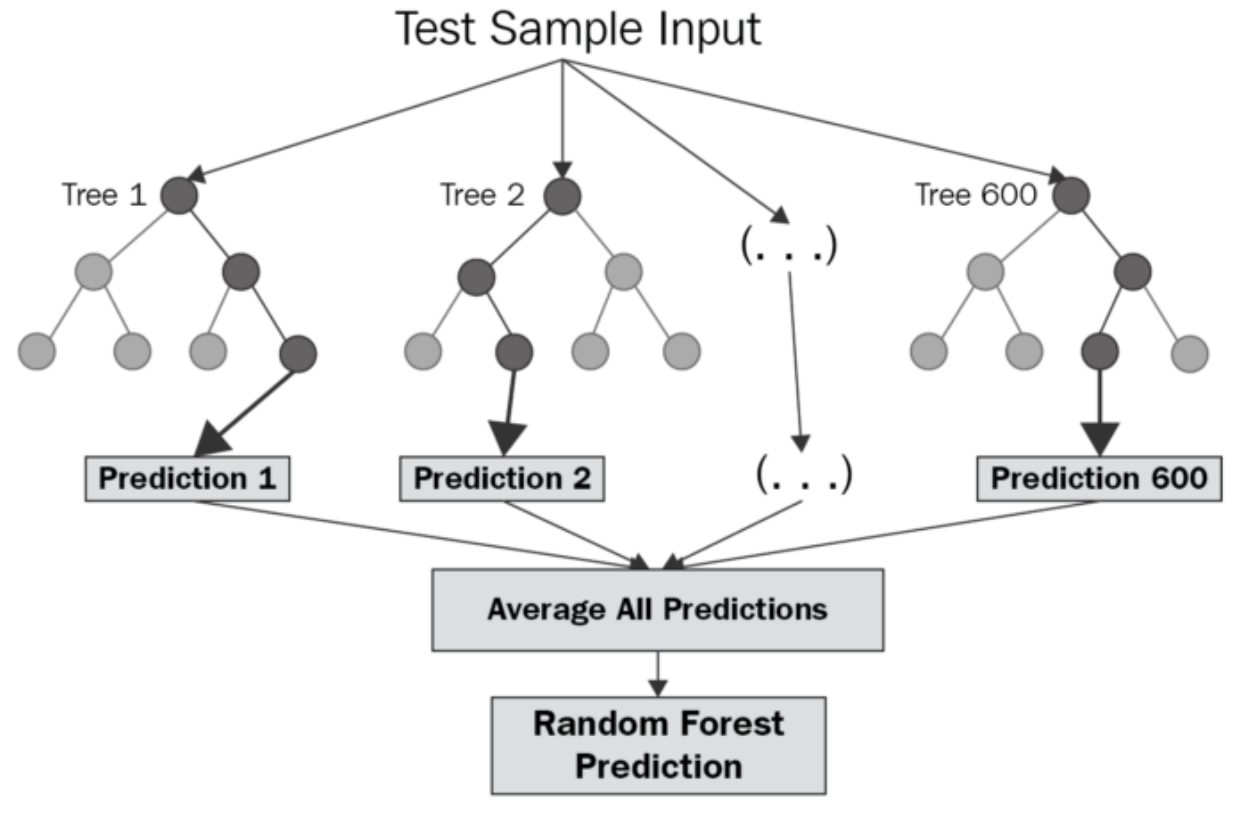

$$
\hat{y}_i = \frac{1}{|S_i|} \sum_{j \in S_i} y_j
$$

>$\hat{y}_i =  리프 노드 𝑖 의 예측값 $
>
>$ {|S_i|} = 리프 노드 𝑖 에 속한 샘플 개수$
>
>$ y_j = 샘플 𝑗의 실제 타겟 값 $


$$
\hat{y}_{\text{RF}}(x) = \frac{1}{N} \sum_{i=1}^{N} \hat{y}_i(x)
$$

$
\hat{y}_{\text{RF}}(x): 랜덤포레스트 모델 최종 예측값
$

$ N : 결정트리 개수 $

$
\hat{y}_i(x) : 𝑖번째 트리에서의 예측값(리프노드에서 나온 예측값)
$


📚분류에서는 다수결 방식이었다면
회귀에서는 모든트리에서의 예측값을 평균낸 거를 최종 랜덤포레스트 회귀예측값으로 사용

#random forest regression

In [49]:
pip install scikit-learn pandas matplotlib


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing


캘리포니아 주택데이터셋 활용

MedInc: 중간 가구 소득

HouseAge: 주택 연령

AveRooms: 평균 방 수

AveOccup: 평균 거주 인원 수

Latitude: 위도

Longitude: 경도

Population: 인구 수

AveHouseholdSize: 평균 가구 규모

타겟 변수: 주택 가격 (연속적인 값)

샘플 수: 약 20,000개의 샘플

In [51]:
# California Housing 데이터셋 로드
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [52]:
df['target'] = california_housing.target  # 가격(target) 열 추가
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [53]:
 # 독립 변수(X)와 타겟 변수(y) 분리
X = df.drop('target', axis=1)
y = df['target']

In [65]:
# 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)
# 성능 평가
mae = mean_absolute_error(y_test, y_pred)  # 평균 절대 오차
mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차
rmse = np.sqrt(mse)  # 제곱근 평균 제곱 오차 (RMSE)
r2 = r2_score(y_test, y_pred)  # 결정 계수 (R^2)
# 결과 출력
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 0.32754256845930246
Mean Squared Error (MSE): 0.2553684927247781
Root Mean Squared Error (RMSE): 0.5053399773665033
R^2 Score: 0.8051230593157366


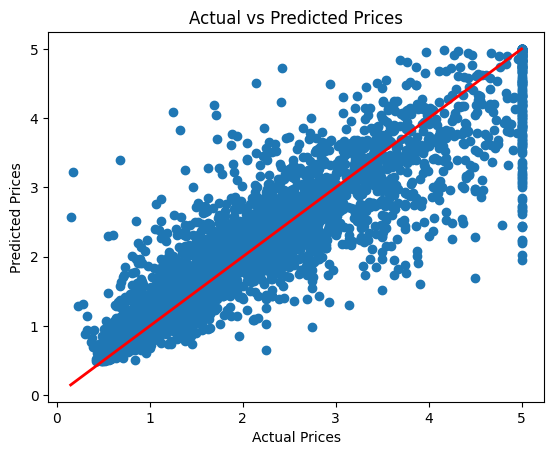

In [59]:
# 실제 값과 예측 값 비교 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()